In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.load('muons_images_v4_DYJets50.root.npy')
tags = np.load('muonClasses_images_v4_DYJets50.root.npy')

In [3]:
def getImage(i):
    image = data[i, :, :, :]
    ecal = image[:, :, 0]
    hcal = image[:, :, 1]
    muon = image[:, :, 2]
    if np.amax(ecal) > 0: ecal /= np.amax(ecal)
    if np.amax(hcal) > 0: hcal /= np.amax(hcal)
    if np.amax(muon) > 0: muon /= np.amax(muon)
    image = np.dstack((ecal, hcal, muon))
    return image, bool(tags[i])

Event number 35
False


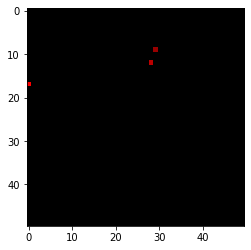

In [27]:
# show an example
i = -1
while True:
    i += 1
    durp, isReco = getImage(i)
    if not isReco:
        print('Event number', i)
        break
#durp, isReco = getImage(0)
print(isReco)
plt.imshow(durp, cmap=plt.cm.binary)

In [5]:
# show the average image
averageImage_reco = np.zeros((50, 50, 3))
averageImage_notReco = np.zeros((50, 50, 3))
nReco = 0
nNotReco = 0

for i in range(data.shape[0]):
    img, isReco = getImage(i)
    if isReco:
        nReco += 1
        averageImage_reco = np.add(averageImage_reco, img)
    else:
        nNotReco += 1
        averageImage_notReco = np.add(averageImage_notReco, img)

averageImage_reco /= nReco
averageImage_notReco /= nNotReco

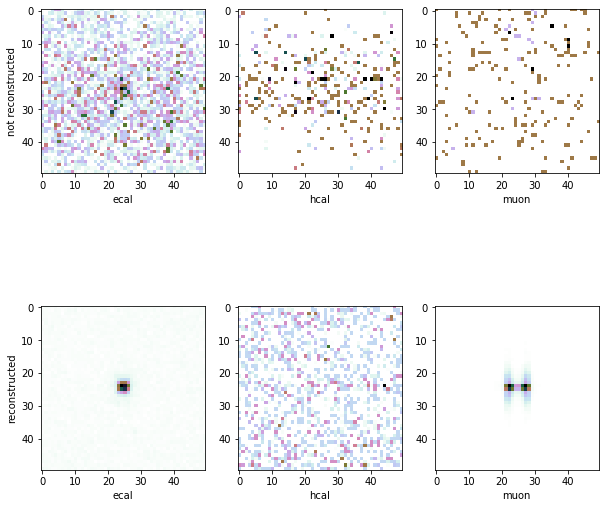

In [6]:
plt.figure(figsize=(10, 10))
labels = ['ecal', 'hcal', 'muon']
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(averageImage_notReco[:, :, i], cmap='cubehelix_r')
    if i == 0: plt.ylabel('not reconstructed')
    plt.xlabel(labels[i])
for i in range(3):
    plt.subplot(2, 3, i+4)
    plt.imshow(averageImage_reco[:, :, i], cmap='cubehelix_r')
    if i == 0: plt.ylabel('reconstructed')
    plt.xlabel(labels[i])

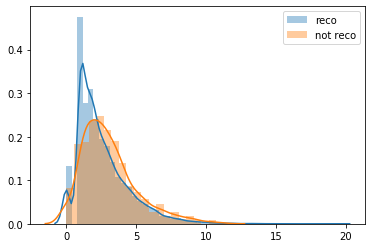

In [22]:
x_reco = []
x_notReco = []

for i in range(data.shape[0]):
    ecalo = np.sum(data[i, :, :, 0])
    ecalo += np.sum(data[i, :, :, 1])
    muon = np.sum(data[i, :, :, 2])
    if tags[i]:
        x_reco.append(ecalo)
    else:
        x_notReco.append(ecalo)

import seaborn as sns

sns.distplot(x_reco, label='reco', kde=True)
sns.distplot(x_notReco, label='not reco', kde=True)
plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


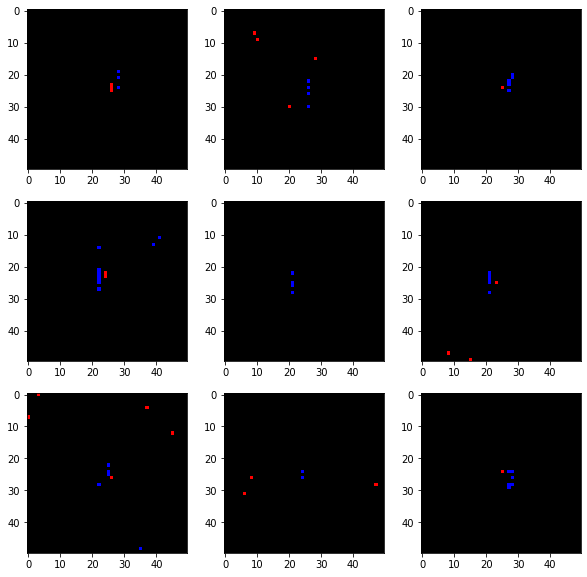

In [42]:
# example of horizontal flip image augmentation
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# expand dimension to one sample
#samples = expand_dims(data, 0)
samples = np.expand_dims(data[1], 0)

# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

import copy
normalizedData = copy.deepcopy(data)
for i in range(data.shape[0]):
    image = data[i, :, :, :]
    ecal = image[:, :, 0]
    hcal = image[:, :, 1]
    muon = image[:, :, 2]
    if np.amax(ecal) > 0: ecal /= np.amax(ecal)
    if np.amax(hcal) > 0: hcal /= np.amax(hcal)
    if np.amax(muon) > 0: muon /= np.amax(muon)
    normalizedData[i] = np.dstack((ecal, hcal, muon))

datagen.fit(normalizedData)

# prepare iterator
it = datagen.flow(normalizedData, batch_size=1)

plt.figure(figsize=(10, 10))
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('float')
    # plot raw pixel data
    plt.imshow(image, cmap=plt.cm.binary)
# show the figure
plt.show()